# Практическая работа №3: Регрессионный анализ
Выполнил студент гр.1374 Хлебников Александр. Вариант 24

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения
1. Линейная регрессионная модель

Регрессионная модель выражается как $Y = \beta_0 +\beta_1X_1+\beta_2X_2+...+\beta_nX_n + \varepsilon$.  

Линейная регрессионная модель выражается как $Y = \beta_0 +\beta_1X + \varepsilon$.  

Где:  
$\beta_0$ - коэффициент сдвига.  
$\beta_1$ - коэффициент наклона.  
$\varepsilon$ - случайная ошибка  

2. МНК (Метод Наименьших Квадратов)

$\beta_1 = \frac{\sum(X_i - \bar{X})(Y_i - \bar{Y})}{\sum(X_i - \bar{X})^2}$  
$\beta_0 = \bar{Y} - \beta_1 \bar{X}$

3. Несмещённая оценка дисперсии

$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2$

4. Доверительный интервал

Довериельный интервал для уровня доверия 1-$\alpha$ выглядит следующим образом:  
$\left[ \widehat{\psi}-X_{\alpha}S\sqrt{b}; \widehat{\psi}+X_{\alpha}S\sqrt{b}\right]$, где $X_{\alpha}: \mathcal{S}_{n-r}(X_{\alpha})=1-\frac{\alpha}{2}$

ДНО функции:$\psi=C^{\intercal}\beta$

МНК-оценка: $\widehat{\psi}=C^{\intercal}\beta$

Элемент дисперсии оценки: $b_{\psi}=C^{\intercal}(XX^{\intercal})^{-1}C$

Распределение $\widehat{\psi}\sim \mathcal{N}(\psi,\sigma^{2}b)$

$\frac{\widehat{\psi}-\psi}{S\sqrt{b}}\sim \mathcal{S}_{n-r}$

5. Теорема Колмогорова

$D_{n}(\overrightarrow{X}) = \overset{}{\underset{X \in \mathbb R}{sup}} |F_{0}(X_{i}) - F_{n}(X_{i})|$

Если гипотеза $H_{0}$ верна, и $F_{0}(X)$ - непрерывная ф-я на $\mathbb R$, тогда имеет место сходимость

$P(\sqrt{n} D_{n}(\overrightarrow{X}) < z) \xrightarrow[n \rightarrow \infty]{} K(z)$, где

$K(z)=1-\alpha$ - ф-я распределения Колмогорова.

Если $D_{n} \lt z$, то гипотезу принимаем

Если $D_{n} \gt z$, то гипотезу отвергаем

6. $\mathbb{F}$-критерий

$\mathbb{F}=\frac{MSR}{MSE}$ - статистика распределения

 где $MSR=\frac{SSR}{p}=\frac{\sum_{i=1}^{n}\left(\sum_{j=1}^{n}x_{ji} \beta_j - \overline{Y}\right)^2}{p}$ - среднеквадратичное отклонение объясненных отклонений

 $MSE = \frac{SS_e}{n-p}=\frac{\sum_{i=1}^{n}\left( Y_{i}-\sum_{j=1}^{m}x_{ji}\beta_{j} \right)^{2}}{n-p}, где SS_{e}=RSS(\beta)$ - среднеквадратичное отклонение остатков

 Критическое значение $\mathbb{F}_{кр}$-критерия уровня значимости $\alpha$ смотрим по таблице критических значение или с помощью кода scipy.stats.f.ppf($1-\alpha$, dfn, dfd), где dfn-числитель степеней свободы(p) dfd-знаменатиль степеней свободы(n-p)

 $\mathbb{F}_{кр} \gt \mathbb{F}$ - гипотезу принимаем

 $\mathbb{F}_{кр} \lt \mathbb{F}$ - гипотезу отвергаем

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y
от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1) Построить графически результаты эксперимента. Сформулировать линейную регриссионную модель переменной Y по переменной X.  Построить МНК оценки параметров сдвига $\beta_{0}$ и масштаба $\beta_{1}$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

Линейная регрессионная модель переменной Y по переменной X выглядит следующим образом:

$Y = \beta_0 + \beta_1X + \varepsilon$

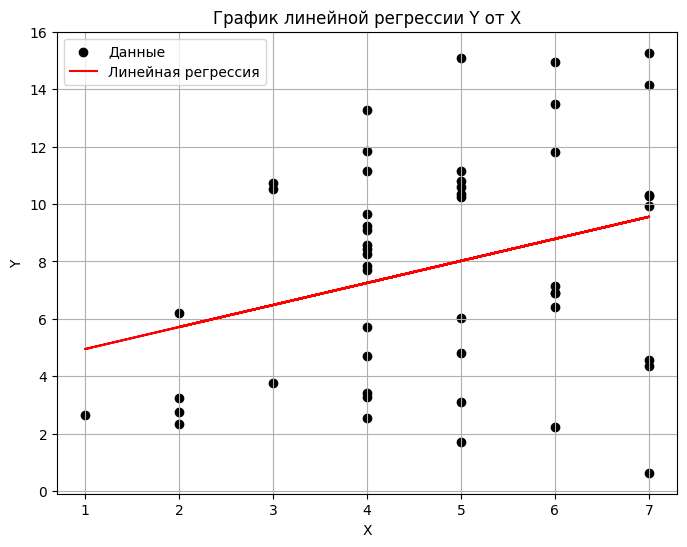

Коэффициент масштаба: 0.767453480358374
Коэффициент сдвига: 4.181619572708477


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Таблица 1
X = [4, 4, 4, 7, 5, 5, 4, 2, 3, 7, 7, 5, 6, 1, 4, 5, 5, 2, 6, 6, 5, 7, 4, 2, 5, 7, 6, 3, 4, 7, 4, 7, 4, 7, 4, 5, 6, 4, 4, 6, 2, 5, 6, 4, 5, 3, 6, 4, 4, 4]
Y = [8.58, 7.84, 8.27, 14.14, 10.61, 1.72, 2.53, 3.23, 10.73, 4.36, 10.27, 10.24, 6.40, 2.64, 11.84, 3.12, 15.10, 2.74, 2.23, 14.95, 10.36, 15.27, 9.66, 6.21, 11.15, 9.94, 6.90, 3.77, 8.45, 10.30, 9.11, 0.64, 13.26, 4.56, 3.40, 4.80, 11.82, 11.16, 7.70, 7.16, 2.35, 10.81, 6.89, 5.72, 6.03, 10.53, 13.48, 9.24, 4.70, 3.29]

h = 1.90

# Преобразуем списки в массивы numpy
X = np.array(X)
Y = np.array(Y)

# Находим коэффициенты линейной регрессии методом наименьших квадратов
beta_1, beta_0 = np.polyfit(X, Y, 1)

# Построение графика с данными и линией регрессии
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='black', label='Данные')
plt.plot(X, beta_0 + beta_1 * X, color='red', label='Линейная регрессия')
plt.title('График линейной регрессии Y от X')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Вывод коэффициентов
print(f"Коэффициент масштаба: {beta_1}")
print(f"Коэффициент сдвига: {beta_0}")

### 2) Построить и интерпретировать несмещенную оценку дисперсии. На базе ошибок построить гистограмму с шагом h. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^{2}$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Несмещенная оценка дисперсии: 14.34035590303661
Статистика критерия Хи-квадрат: 11.461722949122004
Критическое значение: 20.090235029663233
Гипотеза отвергается на уровне значимости 0.01
Значение статистики Колмогорова-Смирнова: 0.10102687861792253
p-значение: 0.650015201441719


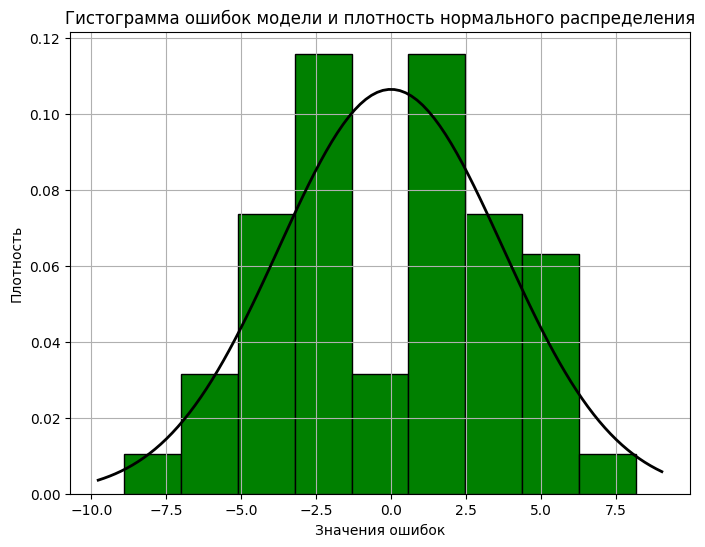

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, kstest, norm, t

# Предсказанные значения по модели
predicted_Y = beta_0 + beta_1 * X

# Ошибки модели
errors = Y - predicted_Y

# Несмещенная оценка дисперсии
n = len(errors)
sigma_squared = np.sum(errors ** 2) / (n - 1)
print(f"Несмещенная оценка дисперсии: {sigma_squared}")

# Проверка гипотезы о нормальности ошибок по хи-квадрат
alpha = 0.01
hist, bin_edges = np.histogram(errors, bins=np.arange(min(errors), max(errors) + h, h))
mu, std = np.mean(errors), np.std(errors)
expected_freq = len(errors) * np.diff(bin_edges) * (1 / np.sqrt(2 * np.pi * std ** 2)) * np.exp(-(bin_edges[:-1] - mu) ** 2 / (2 * std ** 2))
chi_square_stat = np.sum((hist - expected_freq) ** 2 / expected_freq)
critical_value = chi2.ppf(1 - alpha, len(hist) - 1)
print(f"Статистика критерия Хи-квадрат: {chi_square_stat}")
print(f"Критическое значение: {critical_value}")
if chi_square_stat > critical_value:
    print("Гипотеза не отвергается на уровне значимости", alpha)
else:
    print("Гипотеза отвергается на уровне значимости", alpha)


# Оценка расстояния до нормального распределения по Колмогорову
ks_statistic, ks_p_value = kstest(errors, 'norm', args=(mu, std))
print(f"Значение статистики Колмогорова-Смирнова: {ks_statistic}")
print(f"p-значение: {ks_p_value}")

# Визуальная оценка нормальности
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=np.arange(min(errors), max(errors) + h, h), color='green', edgecolor='black', density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Гистограмма ошибок модели и плотность нормального распределения')
plt.xlabel('Значения ошибок')
plt.ylabel('Плотность')
plt.grid(True)
plt.show()

### 3) В предположении нормальности ошибок построить доверительный интервал для параметров $\beta_0,\beta_1$ уровня доверия $1-\alpha$.Построить доверительный эллипс уровня доверия $1-\alpha$ для ($\beta_0,\beta_1$) (вычислить его полуоси).

In [18]:
import scipy.stats as stats

# Оценка стандартной ошибки коэффициентов регрессии
residuals = Y - predicted_Y
MSE = np.sum(residuals ** 2) / (n - 2)
SE_beta_0 = np.sqrt(MSE * (1/n + np.mean(X)**2 / np.sum((X - np.mean(X))**2)))
SE_beta_1 = np.sqrt(MSE / np.sum((X - np.mean(X))**2))

# Критическое значение для уровня доверия
t_critical = stats.t.ppf(1 - alpha/2, df=n-2)

# Доверительные интервалы для коэффициентов
CI_beta_0 = (beta_0 - t_critical * SE_beta_0, beta_0 + t_critical * SE_beta_0)
CI_beta_1 = (beta_1 - t_critical * SE_beta_1, beta_1 + t_critical * SE_beta_1)

# Вывод результатов
print(f"Доверительный интервал для beta_0: {CI_beta_0}")
print(f"Доверительный интервал для beta_1: {CI_beta_1}")

# Матрица признаков с дополнительным столбцом из единиц для beta_0
X_matrix = np.column_stack((np.ones_like(X), X))

# Оценка дисперсии случайной ошибки
sigma_squared = np.sum((Y - predicted_Y) ** 2) / (n - 2)

# Ковариационная матрица
cov_matrix = sigma_squared * np.linalg.inv(np.dot(X_matrix.T, X_matrix))

# Значения полуосей доверительного эллипса
semi_axes = np.sqrt(np.diag(cov_matrix))
print(f"Полуоси доверительного эллипса: {semi_axes}")

Доверительный интервал для beta_0: (-0.5426867602039351, 8.905925905620888)
Доверительный интервал для beta_1: (-0.18505860964014464, 1.7199655703568926)
Полуоси доверительного эллипса: [1.76135234 0.35512291]


### 4) Сформулировать гипотезу независимости переменной Y от переменной X. Провести проверку значимости.

In [13]:
from scipy.stats import f
p = 2  # число параметров в линейной регрессии

# Выводим сумму квадратов отклонений, объясненную с помощью модели
SSE = np.sum((Y - (beta_0 + beta_1 * X)) ** 2)

# Выводим сумму квадратов остатков, оставшуюся после работы модели
SSR = np.sum((beta_0 + beta_1 * X - np.mean(Y)) ** 2)

# Выводим общую сумму квадратов отклонений
SST = SSE + SSR

MSE = SSE / (n - p)  # среднеквадратичное отклонение остатков
MSR = SSR / p  # среднеквадратичное отклонение объясненных отклонений

F = MSR / MSE  # вычисляем значение F-критерия

alpha = 0.01

F_critical = f.ppf(1 - alpha, p, n - p)  # критическое значение F-критерия
print("F-критерий",F)
print("Критическое значение F = ",F_critical)
if F > F_critical:
    print("Отвергаем нулевую гипотезу. Существует значимая зависимость между Y и X.")
else:
    print("Не отвергаем нулевую гипотезу. Нет значимой зависимости между Y и X.")

F-критерий 2.3351605820490464
Критическое значение F =  5.07666380708612
Не отвергаем нулевую гипотезу. Нет значимой зависимости между Y и X.


### 5) Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0, \beta_1, \beta_2$ в данной моделию Изобразить граффически полученную регрессионную зависимость.
Линейная регрессионная модель переменной Y по переменной X формулируется следующим образом:

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \varepsilon,$

где $\beta_0,\beta_1,\beta_2$ - параметры, а $\varepsilon$ - случайная ошибка.

beta_0: -0.8766477689646732
beta_1: 3.2818024738809854
beta_2: -0.27680731332331643


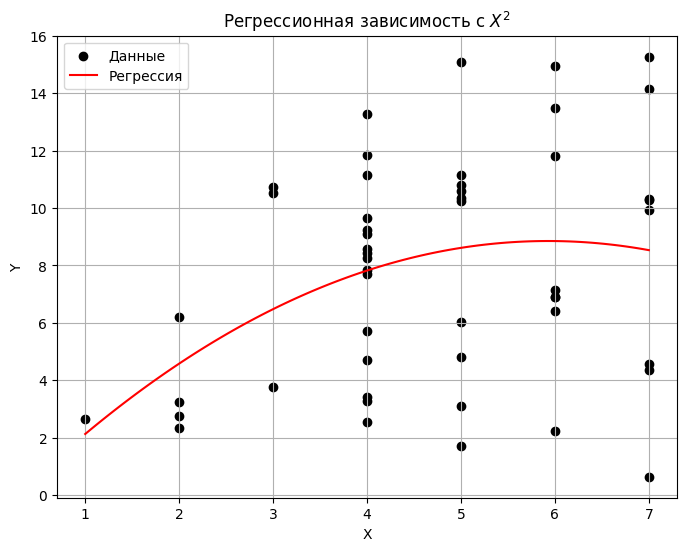

In [14]:
# Включение дополнительного члена X^2
X_squared = np.square(X)

# Матрица признаков с X, X^2 и столбцом из единиц для beta_0
X_matrix_squared = np.column_stack((np.ones_like(X), X, X_squared))

# Находим коэффициенты линейной регрессии методом наименьших квадратов
beta_0_sq, beta_1_sq, beta_2_sq = np.linalg.lstsq(X_matrix_squared, Y, rcond=None)[0]

# Вывод коэффициентов
print(f"beta_0: {beta_0_sq}")
print(f"beta_1: {beta_1_sq}")
print(f"beta_2: {beta_2_sq}")

# Генерация значений X для построения кривой
X_values = np.linspace(min(X), max(X), 100)
X_squared_values = np.square(X_values)

# Предсказанные значения Y по уравнению регрессии
predicted_Y_sq = beta_0_sq + beta_1_sq * X_values + beta_2_sq * X_squared_values

# Построение графика регрессии
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='black', label='Данные')
plt.plot(X_values, predicted_Y_sq, color='red', label='Регрессия')
plt.title('Регрессионная зависимость с $X^2$')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

### 6) Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в пукте 2.

Несмещенная оценка дисперсии (sigma^2): 14.307490047048793
Статистика хи-квадрат (модель с квадратичным членом): 7.919999999999998
Критическое значение хи-квадрат (модель с квадратичным членом): 16.622421871110873
Ошибки модели с квадратичным членом могут иметь нормальное распределение (не отвергать нулевую гипотезу)
Статистика Колмогорова-Смирнова (модель с квадратичным членом): 0.3611887724396273
p-значение (модель с квадратичным членом): 2.382603920376704e-06
Ошибки модели с квадратичным членом не соответствуют нормальному распределению


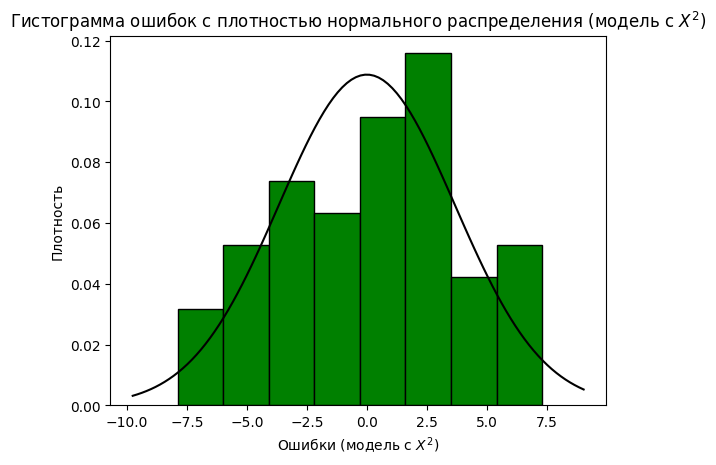

In [15]:
from scipy.stats import chisquare

# Предсказанные значения Y по модели с квадратичным членом
predicted_Y_sq = beta_0_sq + beta_1_sq * X + beta_2_sq * X**2

# Вычисление ошибок модели
errors_sq = Y - predicted_Y_sq

# Оценка несмещенной дисперсии ошибок
n_sq = len(Y)
sigma_squared_unbiased = np.sum(errors_sq ** 2) / (n_sq - 3)

# Вывод оценки несмещенной дисперсии
print(f"Несмещенная оценка дисперсии (sigma^2): {sigma_squared_unbiased}")

# Проверка нормальности ошибок с использованием критерия хи-квадрат
observed_frequencies_sq, bin_edges_sq = np.histogram(errors_sq, bins=np.arange(min(errors_sq), max(errors_sq) + h, h))
expected_frequencies_sq = n_sq * np.diff(bin_edges_sq) / np.sum(np.diff(bin_edges_sq))
chi2_statistic_sq, _ = chisquare(observed_frequencies_sq, expected_frequencies_sq)

# Вычисление критического значения хи-квадрат
chi2_critical_value_sq = chi2.ppf(0.98, df=len(observed_frequencies_sq) - 1)

print("Статистика хи-квадрат (модель с квадратичным членом):", chi2_statistic_sq)
print("Критическое значение хи-квадрат (модель с квадратичным членом):", chi2_critical_value_sq)

if chi2_statistic_sq > chi2_critical_value_sq:
    print('Ошибки модели с квадратичным членом не подчиняются нормальному распределению (отвергнуть нулевую гипотезу)')
else:
    print('Ошибки модели с квадратичным членом могут иметь нормальное распределение (не отвергать нулевую гипотезу)')

# Оценка расстояния оценок до нормального распределения по критерию Колмогорова-Смирнова
ks_statistic_sq, ks_p_value_sq = kstest(errors_sq, 'norm')

print("Статистика Колмогорова-Смирнова (модель с квадратичным членом):", ks_statistic_sq)
print("p-значение (модель с квадратичным членом):", ks_p_value_sq)

if ks_p_value_sq < alpha:
    print("Ошибки модели с квадратичным членом не соответствуют нормальному распределению")
else:
    print("Ошибки модели с квадратичным членом соответствуют нормальному распределению")

# Визуализация ошибок модели с квадратичным членом и плотности нормального распределения
plt.hist(errors_sq, bins=np.arange(min(errors_sq), max(errors_sq) + h, h), color='green', edgecolor='black', density=True)
plt.plot(x, norm.pdf(x, np.mean(errors_sq), np.std(errors_sq)), 'k')
plt.xlabel('Ошибки (модель с $X^2$)')
plt.ylabel('Плотность')
plt.title('Гистограмма ошибок с плотностью нормального распределения (модель с $X^2$)')
plt.show()

### 7) В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0,\beta_1,\beta_2$ уровня доверия $1-\alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1-\alpha$.

In [16]:
in_sq = len(Y)
se_beta_0_sq = np.sqrt(sigma_squared_unbiased * (1 / n_sq + np.mean(X) ** 2 / np.sum((X - np.mean(X)) ** 2)))
se_beta_1_sq = np.sqrt(sigma_squared_unbiased / np.sum((X - np.mean(X)) ** 2))
se_beta_2_sq = np.sqrt(sigma_squared_unbiased / np.sum((X - np.mean(X)) ** 2))

# Критическое значение t-статистики
k_sq = 3  # Количество параметров (включая beta_0)
t_critical_sq = t.ppf(1 - alpha / 2, df=n_sq - k_sq)

# Доверительные интервалы для beta_0, beta_1, beta_2
ci_beta_0_sq = (beta_0_sq - t_critical_sq * se_beta_0_sq, beta_0_sq + t_critical_sq * se_beta_0_sq)
ci_beta_1_sq = (beta_1_sq - t_critical_sq * se_beta_1_sq, beta_1_sq + t_critical_sq * se_beta_1_sq)
ci_beta_2_sq = (beta_2_sq - t_critical_sq * se_beta_2_sq, beta_2_sq + t_critical_sq * se_beta_2_sq)

print(f"Доверительный интервал для beta_0: {ci_beta_0_sq}")
print(f"Доверительный интервал для beta_1: {ci_beta_1_sq}")
print(f"Доверительный интервал для beta_2: {ci_beta_2_sq}")

F_value = f.ppf(1 - alpha, 3, n - 3)

# Вычисляем полуоси эллипсоида
semi_axes = np.sqrt(F_value) * np.sqrt(np.diag(cov_matrix))

# Уравнение доверительного эллипсоида
print("Уравнение доверительного эллипсоида для beta_1 и beta_2:")
print(f"(({beta_1_sq} - x1) / {semi_axes[0]})**2 + (({beta_2_sq} - x2) / {semi_axes[1]})**2 <= 1")

Доверительный интервал для beta_0: (-5.5512319606125695, 3.7979364226832226)
Доверительный интервал для beta_1: (2.339315335136182, 4.224289612625789)
Доверительный интервал для beta_2: (-1.21929445206812, 0.6656798254214872)
Уравнение доверительного эллипсоида для beta_1 и beta_2:
((3.2818024738809854 - x1) / 3.621667883044038)**2 + ((-0.27680731332331643 - x2) / 0.7301987215617638)**2 <= 1


### 8) Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной X и проверить её значимость на уровне $\alpha$.

Гипотеза линейной регрессионной зависимости переменной Y от переменной X может быть сформулирована следующим образом:

H0: $\beta_1 = \beta_2 = 0$ (нет линейной зависимости между Y и X)

H1: Хотя бы один из коэффициентов $\beta_1, \beta_2$ не равен нулю (существует линейная зависимость между Y и X)

In [17]:
# Выводим сумму квадратов остатков, оставшуюся после работы модели
SSR = np.sum((beta_0_sq + beta_1_sq * X + beta_2_sq * X ** 2 - np.mean(Y)) ** 2)
# Выводим сумму квадратов отклонений, объясненную с помощью модели
SSE = np.sum((Y - (beta_0_sq + beta_1_sq * X + beta_2_sq * X ** 2)) ** 2)
p = 3
# Выводим общую сумму квадратов отклонений
SST = SSE + SSR
MSE = SSE / (n - p)  # среднеквадратичное отклонение остатков
MSR = SSR / p  # среднеквадратичное отклонение объясненных отклонений
F = MSR / MSE  # вычисляем значение F-критерия

alpha = 0.01

F_critical = f.ppf(1 - alpha, p, n - p)  # критическое значение F-критерия

print("F =",F)
print("Критическое значение =", F_critical)
# Проверка значимости гипотезы
if F_critical < alpha:
    print(f"Гипотеза линейной регрессионной зависимости переменной Y от переменной X значима на уровне {alpha}")
else:
    print(f"Гипотеза линейной регрессионной зависимости переменной Y от переменной X не значима на уровне {alpha}")

F = 2.2970431912349705
Критическое значение = 4.227900552121905
Гипотеза линейной регрессионной зависимости переменной Y от переменной X не значима на уровне 0.01


### Выводы:

В ходе выполнение работы ознакомились с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.